# Decision_Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
# Loading the iris dataset
df=pd.read_csv("F:\Iris.csv")

In [3]:
#Exploring the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Summary Statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.shape

(150, 6)

In [9]:
x = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [10]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print(y_preds)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [12]:
#accuracy
accuracy_score(y_preds,y_test)

0.9666666666666667

In [14]:
#confusion matrix
confusion_matrix(y_test,y_preds)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]], dtype=int64)

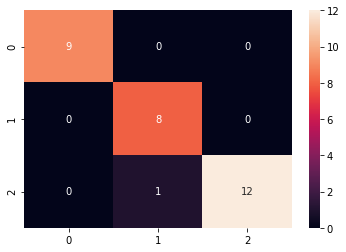

In [15]:
#plotting the confusion matrix
sns.heatmap(confusion_matrix(y_preds,y_test),annot=True)
plt.show()

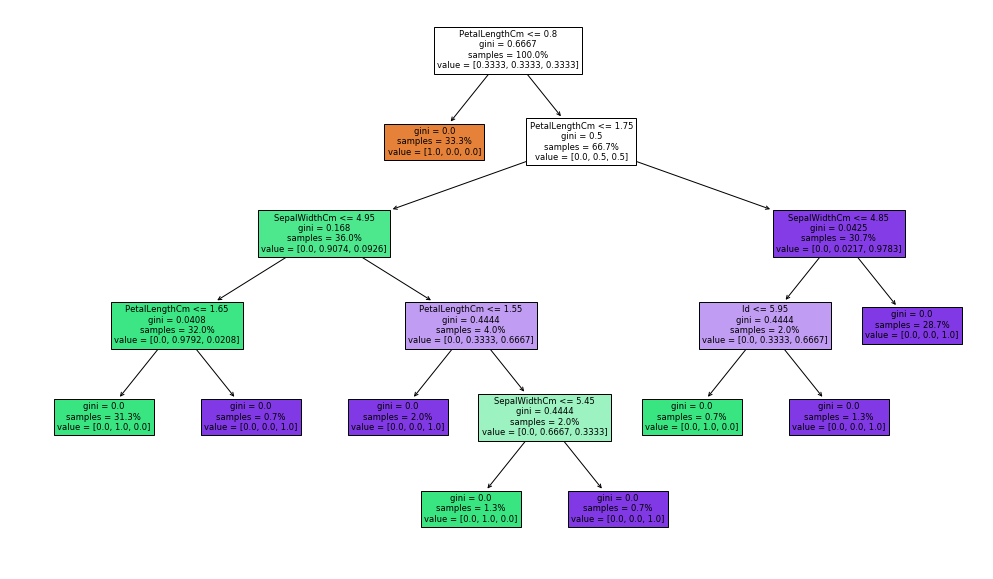

In [16]:
#plotting the tree
plt.figure(figsize=(17,10))
tree.plot_tree(model.fit(x,y),feature_names=list(df.columns),proportion=True,filled=True,precision=4)
plt.show()